In [1]:
from visualsTree import *

def leetparse(s):
    s = s.strip()
    s = s[1:-1]
    lis = s.split(',')
    for i in range(len(lis)):
        if notNull(lis[i]):
            try:
                lis[i] = int(lis[i])
            except:
                pass
    return makeLevel(lis)

# View of Binary Tree

## Left view

[0, 1, 3]


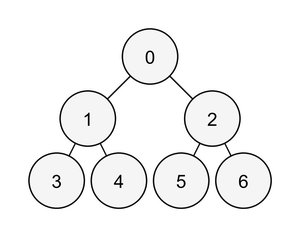

In [2]:
root = make(range(7))

def solve(root):
    d = dict()
    
    def dfs(root, level=0, count=0):
        if root is None: return
        if level not in d:
            d[level] = (count, root.val)
        else:
            if d[level][0] > count:
                d[level] = (count, root.val)
        
        dfs(root.right, level+1, count+1)
        dfs(root.left, level+1, count-1)
    
    dfs(root)
    return [i[1][1] for i in sorted(d.items())]

print(solve(root))
DrawTree(root, (300, 300)).drawTree()

## Top view

[3, 1, 0, 2, 6]


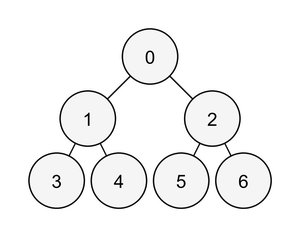

In [3]:
def solve(root):
    d = dict()
    
    def dfs(root, level=0, count=0):
        if root is None: return 
        dfs(root.left, level+1, count-1)
        dfs(root.right, level+1, count+1)
        if count not in d:
            d[count] = (level, root.val)
        else:
            if d[count][0] > level:
                d[count] = (level, root.val)
    
    dfs(root)
    return [i[1][1] for i in sorted(d.items())]

print(solve(root))
DrawTree(root, (300, 300)).drawTree()

## Zig-Zag level Order

[0, 2, 1, 3, 4, 5, 6]


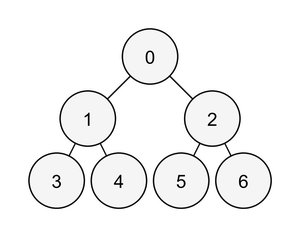

In [4]:
def solve(root):
        from collections import deque
        q = deque([(root)])
        ans = []
        level = 0

        while q:
            s = len(q)
            temp = []
            for _ in range(s):
                node = q.popleft()
                if node:
                    temp.append(node.val)
                    q.append(node.left)
                    q.append(node.right)

            # temp cam be empty too so be careful sometimes
            if level&1: ans += temp[::-1][:]
            else: ans += temp[:]

            level += 1
        
        return ans
    
root = make(range(7))
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

# Find Actual Tree from Given Pre, Post, In Or Level orders

## PreOrder and Inorder

preOrder = ***\[root, left sub-tree, right sub-tree\]***  
inOrder = ***\[left sub-tree, root, right sub-tree\]*** 

If we have root, we can easily partition inOrder.  
once we know the size of left sub-tree and right sub-tree from inOrder partition  
we can easily partition the preOrder.  

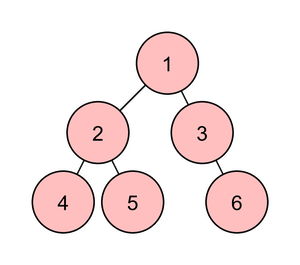

In [5]:
inOrder = [4, 2, 5, 1, 3, 6]
preOrder = [1, 2, 4, 5, 3, 6]

def solve(inOrder, preOrder):
    if not inOrder: return None
    n = len(inOrder)
    
    # get root value
    first = preOrder[0]
    root = Node(first)
    
    # find root in inOrder
    index = -1
    for i in range(n):
        if inOrder[i] == first:
            index = i
            break
            
    # build sub in and pre orders
    left_inOrder = inOrder[:index]
    right_inOrder = inOrder[index+1:]
    
    left_preOrder = preOrder[1: index+1]
    right_preOrder = preOrder[index+1:]
    
    # call recursion
    root.left = solve(left_inOrder, left_preOrder)
    root.right = solve(right_inOrder, right_inOrder)    
    
    return root

root = solve(inOrder, preOrder)
DrawTree(root, (300, 300)).drawTree('red')

## LevelOrder and InOrder

Almost similar trick as of before, but the only problem is how do we find the sub level orders?  
The levelOrder of sub-tree is always in the sequence in the parent sub-tree levelOrder.  
So once got the elements from inorder get the sequence from levelOrder.

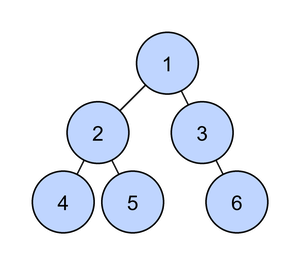

In [6]:
level = [1, 2, 3, 4, 5, 6]
inOrder = [4, 2, 5, 1, 3, 6]

def solve(level, inOrder):
    if not level: return None
    n = len(level)
    
    # get the root value
    first = level[0]
    root = Node(first)
    
    # get root index
    index = -1
    for i in range(n):
        if inOrder[i] == first:
            index = i
            break
    
    # partition inOrder
    inOrder_left = inOrder[:index]
    inOrder_right = inOrder[index+1:]
    
    # build level order on the base of sequence and presence in inOrder
    level_right = [i for i in level if i in inOrder_right]
    level_left = [i for i in level if i in inOrder_left]
    
    # call recursion
    root.left = solve(level_left, inOrder_left)
    root.right = solve(level_right, inOrder_right)
    
    return root

root = solve(level, inOrder)
DrawTree(root, (300, 300)).drawTree('blue')

# Kth Ancestor

5


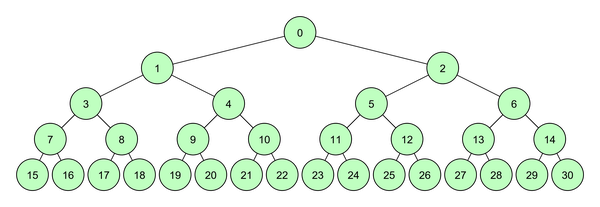

In [7]:
def solve(root, val, k):
    if root is None: return None, 0
    if root.val == val:
        return (root, 1)
    node, l = solve(root.left, val, k)
    if node is not None:
        if l<=k: return root, l+1
        else: return node, l+1
        
    node, l = solve(root.right, val, k)
    if node is not None:
        if l<=k: return root, l+1
        else: return node, l+1
    
    return None, 0

root = make(range(31))
print(solve(root, 24, 2)[0])
DrawTree(root, (600, 300)).drawTree('green')

# [All Nodes Distance K in Binary Tree](https://leetcode.com/problems/all-nodes-distance-k-in-binary-tree/)

In constant space ignoring stack memory.

[7, 8, 9, 10, 2]


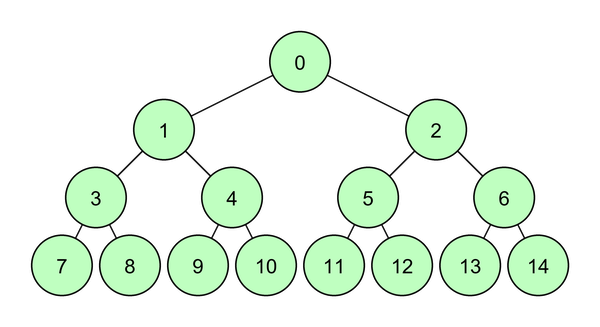

In [8]:
def distanceK(root, target, k: int) -> list:
    # NOTE: target is also a node
    ans = []
    
    # appends node value which are at k distance below given node
    def dfsk(node, k):
        if not node:
            return

        if k<0:
            return 

        if k == 0:
            ans.append(node.val)
            return

        dfsk(node.left, k-1)
        dfsk(node.right, k-1)

    def dfs(node):
        if not node:
            return 0

        # if found return distance and append nodes below it
        if node == target:
            dfsk(node, k)
            return 1

        # if  k1 is +ve then target is in left sub-tree, so get rest of distance from right sub-tree
        k1 = dfs(node.left)
        if k1:
            if k==k1: ans.append(node.val)
            else: dfsk(node.right, k-k1-1)
            return 1+k1


        # if  k2 is +ve then target is in right sub-tree, so get rest of distance from left sub-tree
        k2 = dfs(node.right)
        if k2:
            if k==k2: ans.append(node.val)
            else: dfsk(node.left, k-k2-1)
            return 1+k2

        # didn't found so return 0
        return 0

    dfs(root)
    return ans

root = make(range(15))
print(distanceK(root, root.left, 2))
DrawTree(root, (600, 300)).drawTree('green')

# Distance between Two Nodes

4


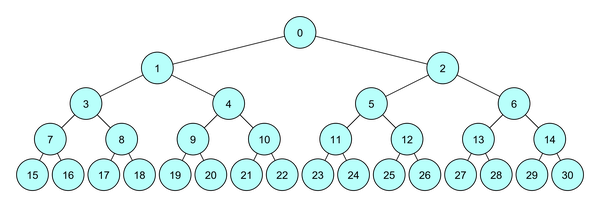

In [9]:
def solve(root, a, b):
    def find(root, a):
        if root is None: return 0
        if root.data == a:
            return 1

        v = find(root.left, a)
        if v: return v+1

        v = find(root.right, a)
        if v: return v+1

        return 0

    def LCA(root, a, b):
        if root is None: return None
        if root.data == a or root.data == b: return root

        r1 = LCA(root.left, a, b)
        r2 = LCA(root.right, a, b)

        if r1 and r2: return root
        if r1 or r2: return r1 if r1 else r2
        return None
    
    lca = LCA(root, a, b)
    return find(lca, a) + find(lca, b) - 2

root = make(range(31))
print(solve(root, 24, 25))
DrawTree(root, (600, 300)).drawTree('cyan')

# Pairs of node with sum equals root in a root to leaf path

False


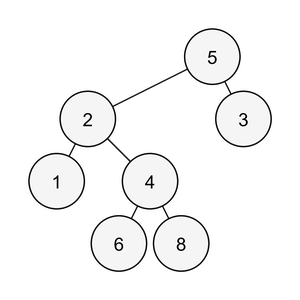

In [10]:
def solve(root):
    temp = root.val
    def rec(root, s=set()):
        if root is None: return False
        if (temp - root.val) in s: return True
        s.add(root.val)
        if rec(root.left, s) or rec(root.right, s): return True
        s.remove(root.val)
        return False
    return rec(root)
        
root = make([5, 2, 3, 1, 4, 'N', 'N', 'N', 'N', 6, 8])
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

# Number of Good Leaf Nodes Pairs

1


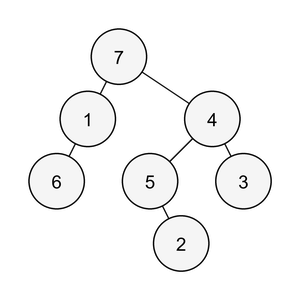

In [11]:
from bisect import *

class Solution:
    def countPairs(self, root, distance: int) -> int:
        self.total = 0
        
        def merge(a, b):
            final = []
            n, m = len(a), len(b)
            i, j = 0, 0
            while i<n and j<m:
                if a[i]<=b[j]:
                    final.append(a[i])
                    i+=1
                else:
                    final.append(b[j])
                    j+=1
            final += a[i:]
            final += b[j:]
            return final
            
        def solve(root):
            if not root: return []
            if root.left is None and root.right is None: return [0]
            
            left = solve(root.left)
            right = solve(root.right)
            
            # remove those element which are larger than distance
            left = [i+1 for i in left if i+1<distance]
            right = [i+1 for i in right if i+1<distance]
            
            # since arrays are sorted we can use binary search to 
            # get number of elements less than some value
            
            #swap to iterate over smaller length
            if len(left)>len(right): left, right = right, left
            for i in left: self.total += bisect_right(right, distance - i)
                
            # to keep final array sorted merge left and right
            final = merge(left, right)
            
            return final
        
        solve(root)
        return self.total
    
root = make([7,1,4,6,'null',5,3,'null','null','null','null','null',2])
s = Solution()
ans = s.countPairs(root, 3)
print(ans)
DrawTree(root, (300, 300)).drawTree()

28


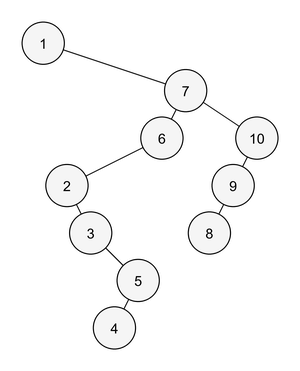

In [12]:
def solve(root):
    def rec(root, l=0):
        if root is None: return (0, l)
        left, l1 = rec(root.left, l+1)
        right, l2 = rec(root.right, l+1)

        if l1 == l2: return (root.data + max(left, right), l1)
        return (root.data + (left if l1 > l2 else right), l1 if l1 > l2 else l2)

    return rec(root, 0)[0]

s = "1 N 7 6 10 2 N 9 N N 3 8 N N 5 N N 4"
lis = list(map(lambda x: int(x) if x.isdigit() else x, s.strip().split()))
root = makeLevel(lis)
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

# Path Sum

## Maximum sum Path

216


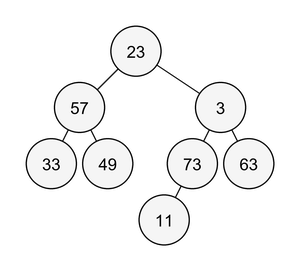

In [13]:
def solve(root):
    inf = int(1e10)
    
    def rec(root):
        if root is None: return 0, -inf
        line1, sub1 = rec(root.left)
        line2, sub2 = rec(root.right)
        line = root.val + max(0, line1, line2)
        sub = max(line, sub1, sub2, root.val + line1 + line2)
        return line, sub
    return rec(root)[1]

root = randomTree()
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

## Max sum path between 2 leaves

216


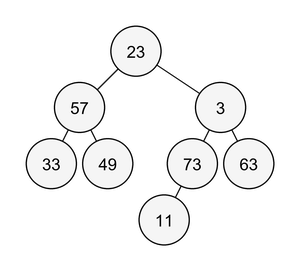

In [14]:
def maxPathSum(root):
    if root is None: return -int(1e10)
    line1 = maxPathSum(root.left)
    line2 = maxPathSum(root.right)
    return root.data + max(0, line1, line2)

lis = [-10, -4, -10, -3, -2, 10, -7, 5, -1, 'n', -10, -6, -6, 10, 8, -3, 0, 5, 4, 'n', -7, 5]
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

## [Path sum III](https://leetcode.com/problems/path-sum-iii/submissions)
Count total number of linear paths(No two Nodes have same parent) which sums upto target

3


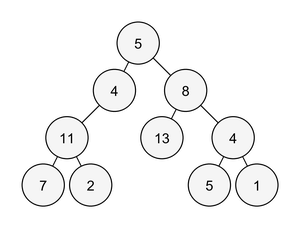

In [15]:
def solve(root, targetSum: int) -> int:
    d = defaultdict(int)
    d[0] = 1  # important
    count = 0

    def dfs(root, s=0):
        nonlocal d, count
        if root is None: return
        s += root.val
        count += d[(s - targetSum)]
        d[s] += 1
        dfs(root.left, s)
        dfs(root.right, s)
        d[s] -= 1

    dfs(root)
    return count

root = leetparse("[5,4,8,11,null,13,4,7,2,null,null,5,1]")
print(solve(root, 22))
DrawTree(root, (300, 300)).drawTree()

## Max of non-adjacent sum of Nodes

25


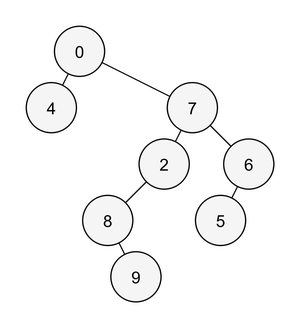

In [16]:
def getMaxSum(root):
        
        # dp solution
        d = dict()
        def solve(root, flag=True):
            if root is None: return 0
            
            if (root, flag) in d: return d[(root, flag)]
            
            # cannot choose
            if not flag:
                b = solve(root.left, True) + solve(root.right, True)
                
                d[(root, flag)] = b
                return b
            # if can choose, check for both
            else:
                a = root.data + solve(root.left, False) + solve(root.right, False)
                b = solve(root.left, True) + solve(root.right, True)
                
                d[(root, flag)] = max(a, b)
                return max(a, b)
        
        return max(solve(root, True), solve(root, False))

root = randomTree(max_range=10)
print(getMaxSum(root))
DrawTree(root, (300, 300)).drawTree()

# Genral

## Mirror a Binary Tree

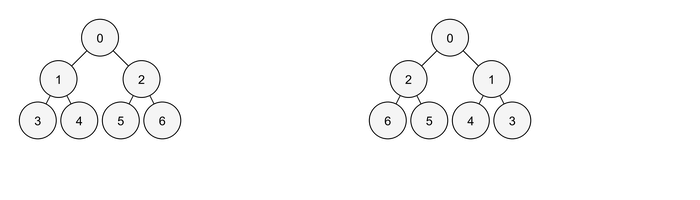

In [17]:
def solve(root):
    if root is None: return None
    droot = Node(root.val)
    droot.right = solve(root.left)
    droot.left = solve(root.right)
    return droot

root = make(range(7))
droot = solve(root)
im1 = DrawTree(root, (200, 200)).drawTree()
im2 = DrawTree(droot, (200, 200)).drawTree()
im = Image.new('RGBA', (700, 200))
im.paste(im1, (0, 0))
im.paste(im2, (350, 0))
im

## [BT Camera](https://leetcode.com/problems/binary-tree-cameras/)

In [18]:
class Solution:
    def minCameraCover(self) -> int:
        self.ans = 0
        covered = {None}

        def dfs(node, par = None):
            if node:
                dfs(node.left, node)
                dfs(node.right, node)

                if (par is None and node not in covered) or \
                        (node.left not in covered) or (node.right not in covered):
                    self.ans += 1
                    covered.update({node, par, node.left, node.right})

        dfs(root)
        return self.ans

## [Minimum Cost Tree From Leaf Values](https://leetcode.com/problems/minimum-cost-tree-from-leaf-values/)

In [19]:
def mctFromLeafValues(arr) -> int:
    n = len(arr)
    dp = [[-1 for i in range(n)] for i in range(n)]

    def solve(i=0, j=n-1):
        if i>=j: return 0
        if i+1 == j:
            return arr[i]*arr[j]

        if dp[i][j] != -1: return dp[i][j]
        dp[i][j] = 1e10
        for k in range(i, j):
            l, m1, m2, r = i, k, k+1, j
            dp[i][j] = min(dp[i][j], 
                    solve(l, m1)+solve(m2, r)+ max(arr[l:m1+1])*max(arr[m2:j+1]))

        return dp[i][j]

    return solve()

arr = [6, 2, 4]
mctFromLeafValues(arr)

32